#Sudoku Solving with Neural Network Models- Part 1
Author - MEGHA ELDHO

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Define transformations for MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load MNIST data
mnist_data = datasets.MNIST(root='mnist_data', train=True, download=True, transform=transform)

In [9]:
# Split the dataset into train and validation sets
train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size
train_data, val_data = random_split(mnist_data, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [10]:
# Define the model
class CNNMNISTModel(nn.Module):
    def __init__(self):
        super(CNNMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

cnn_mnist_model = CNNMNISTModel()

In [12]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist_model.parameters(), lr=0.001)

num_epochs = 10

# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    cnn_mnist_model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = cnn_mnist_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute training accuracy and loss
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 100}')
            running_loss = 0.0

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    cnn_mnist_model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = cnn_mnist_model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy and loss
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}')



Epoch [1/10], Step [100/750], Loss: 0.609096961170435
Epoch [1/10], Step [200/750], Loss: 0.18551540561020374
Epoch [1/10], Step [300/750], Loss: 0.14089028695598244
Epoch [1/10], Step [400/750], Loss: 0.10590807010419667
Epoch [1/10], Step [500/750], Loss: 0.07937136877328158
Epoch [1/10], Step [600/750], Loss: 0.0770792595623061
Epoch [1/10], Step [700/750], Loss: 0.06733147357590497
Epoch [1/10], Train Loss: 0.004300513625144958, Train Accuracy: 0.948375, Val Loss: 0.07869500095183228, Val Accuracy: 0.9756666666666667
Epoch [2/10], Step [100/750], Loss: 0.06287672255188227
Epoch [2/10], Step [200/750], Loss: 0.06089512834325433
Epoch [2/10], Step [300/750], Loss: 0.06319700109306722
Epoch [2/10], Step [400/750], Loss: 0.05048425759421662
Epoch [2/10], Step [500/750], Loss: 0.04630071057705209
Epoch [2/10], Step [600/750], Loss: 0.04319494583935011
Epoch [2/10], Step [700/750], Loss: 0.04169517045142129
Epoch [2/10], Train Loss: 0.002473214452465375, Train Accuracy: 0.983875, Val Los

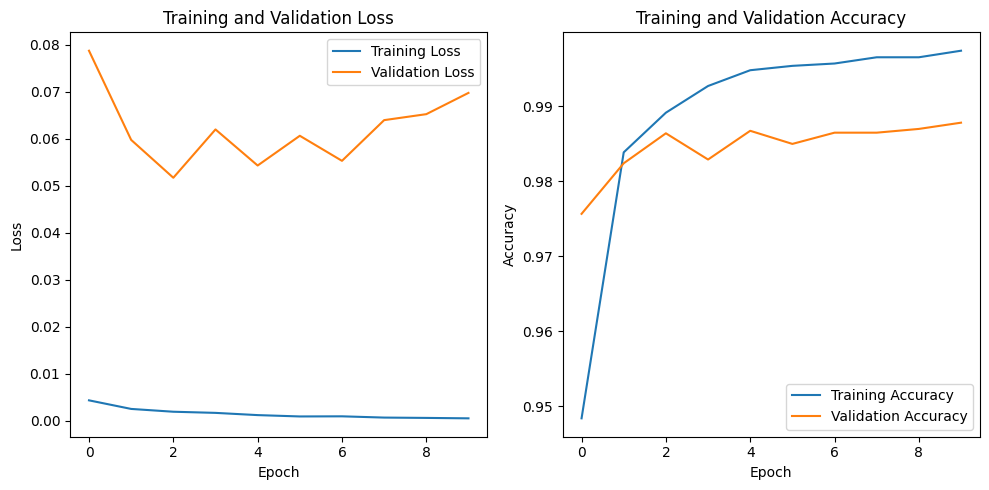

In [13]:
# Plotting graphs
plt.figure(figsize=(10, 5))

# Plotting training and validation losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Data Preprocessing

In [14]:
test_data = np.load('/content/drive/MyDrive/imgs.npy')
test_data



array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
testdatatransform = torch.tensor(test_data)
testdatatransform.shape


torch.Size([10000, 252, 252])

In [15]:
#code to slice the image into blocks to recognize each digits in the sudoku puzzle
sliced_images = []
for index, image in enumerate(test_data):
  blocks = []
  for i in range(0, 252, 28):#since there are 9 cells in a row in a sudoku puzzle the stepsize is 28(252/9)
      for j in range(0, 252, 28):
          block = image[i:i+28, j:j+28]
          block_info = {'index': index, 'row': (i//28), 'column': (j//28), 'block': block}
          #print(block_info)
          blocks.append(block_info)
  sliced_images.append(blocks)




#Prediction

In [16]:
#lists to store the predicted digit
prediction = []
ids = []

In [17]:

for blocks_info in sliced_images:
        for block_info in blocks_info:
            block = torch.from_numpy(block_info['block']).unsqueeze(0).unsqueeze(0).float()

            image_index = block_info['index']
            row =   block_info['row']
            column = block_info['column']
            id = str(image_index) + "_" + str(row) + str(column)
            if block.sum() == 0:  # Check if the block is empty
                predicted_sliced = 0
            else:
              # Forward pass on the sliced image block
              output_sliced = cnn_mnist_model(block)
              _, predicted_sliced = torch.max(output_sliced.data, 1)
            prediction.append(int(predicted_sliced))
            ids.append(id)
output = pd.DataFrame({'id' : ids, 'values' : prediction})
output.to_csv('predictions.csv',index=False)


#Task 2/ Preprocessing , Part 1

In [18]:
imgs = np.load('/content/drive/MyDrive/imgs (1).npy')
labels = np.load('/content/drive/MyDrive/labels.npy')

This code is to process the train images and the corresponding labels and eacsudoku puzzzles will be put into the csv files as rows.

In [19]:
import torch
import pandas as pd
import numpy as np

def solve_and_save_as_csv(p, cnn_mnist_model, filename):
    sliced_images = []
    for index, image in enumerate(p):
        blocks = []
        for i in range(0, 252, 28):
            for j in range(0, 252, 28):
                block = image[i:i+28, j:j+28]
                block_info = {'index': index, 'row': (i//28), 'column': (j//28), 'block': block}
                blocks.append(block_info)
        sliced_images.append(blocks)

    index_values_dict = {}
    with torch.no_grad():
        for blocks_info in sliced_images:
            for block_info in blocks_info:
                block = torch.from_numpy(block_info['block']).unsqueeze(0).unsqueeze(0).float()
                image_index = block_info['index']
                row = block_info['row']
                column = block_info['column']
                id = str(image_index) + "_" + str(row) + str(column)

                if block.sum() == 0:  # Check if the block is empty
                    predicted_sliced = 0
                else:
                    # Forward pass on the sliced image block
                    output_sliced = cnn_mnist_model(block)
                    _, predicted_sliced = torch.max(output_sliced.data, 1)
                    predicted_sliced_str = str(predicted_sliced.item())

                # Concatenate the predicted values for each unique index
                if image_index not in index_values_dict:
                    index_values_dict[image_index] = predicted_sliced_str
                else:
                    index_values_dict[image_index] += predicted_sliced_str

    # Convert the dictionary values to a DataFrame
    df_concatenated_values = pd.DataFrame({'index': list(index_values_dict.keys()), 'predicted_values': list(index_values_dict.values())})

    # Save the DataFrame with concatenated predicted values to a CSV file
    df_concatenated_values.to_csv(filename + '.csv', index=False)




In [ ]:
solve_and_save_as_csv(imgs, cnn_mnist_model, 'imgs')


In [ ]:
solve_and_save_as_csv(labels, cnn_mnist_model, 'labels')

In [ ]:
solve_and_save_as_csv(test_data, cnn_mnist_model, 'test_predictions')


In [25]:
data = pd.read_csv("/content/labels.csv")

In [26]:
data.shape

(50000, 2)

In [ ]:
import pandas as pd
import random

file2_path = '/content/labels.csv'

df2 = pd.read_csv(file2_path)
col2_df2 = df2.iloc[:, 1]

# Replace zeros with random numbers between 1 and 9 in the puzzles
for i, puzzle_str in col2_df2.iteritems():
    puzzle = [int(char) if char.isdigit() and char != '0' else random.randint(1, 9) for char in str(puzzle_str)]

    df2.iloc[i, 1] = ''.join(map(str, puzzle))

# Save the modified DataFrame back to a new CSV file
df2.to_csv('labels.csv', index=False)


In [44]:
data = pd.read_csv("/content/labels.csv")
data
print(data.iloc[0][1])

683295417421867359795341662572134986846577123349682574138426795964758231257913648


In [29]:

file1_path = '/content/imgs.csv'
file2_path = '/content/labels.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Extract the second columns from both DataFrames
col2_df1 = df1.iloc[:, 1]
col2_df2 = df2.iloc[:, 1]
merged_df = pd.concat([col2_df1, col2_df2], axis=1)
new_headers = ['quizzes', 'solutions']
merged_df.columns = new_headers
merged_df.to_csv('s2annimp.csv', index=False)

